In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

Text(0, 0.5, 'perm(D)')

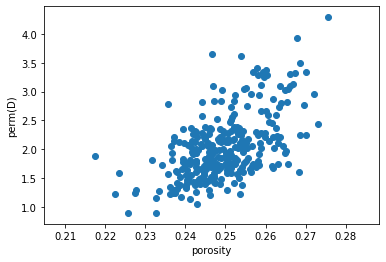

In [13]:
#Data
#Sandstone
phi_s = np.abs(np.random.normal(0.25,0.01,300))
swc_s = np.abs(np.random.normal(0.1,0.01,300))
k_s = 8.58102*(phi_s**(4.4))/(swc_s**2)
plt.scatter(phi_s,k_s)
plt.xlabel('porosity')
plt.ylabel('perm(D)')

Text(0, 0.5, 'perm(D)')

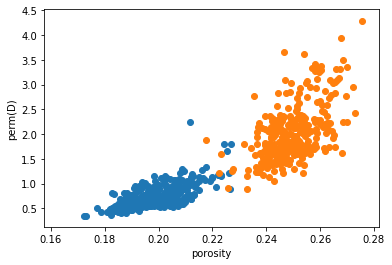

In [20]:
#Data
#Limestone
phi_l = np.abs(np.random.normal(0.20,0.01,300))
swc_l = np.abs(np.random.normal(0.1,0.01,300))
k_l = 8.58102*(phi_l**(4.4))/(swc_l**2)
plt.scatter(phi_l,k_l)
plt.scatter(phi_s,k_s)
plt.xlabel('porosity')
plt.ylabel('perm(D)')

In [25]:
#DataFrame Sandstone
dfS = pd.DataFrame({'Porosity':phi_s , 'Swc':swc_s, 'Permeability(D)':k_s})
dfS['label'] = 1
label_s = np.array(dfS['label'])
dfS['lithology'] = "Sandstone"
lithologyS = np.array(dfS['lithology'])
dfS

,Porosity,Swc,Permeability(D),label,lithology
0,0.250184,0.099716,1.942464,1,Sandstone
1,0.236178,0.105787,1.339459,1,Sandstone
2,0.247057,0.104133,1.685289,1,Sandstone
3,0.250378,0.122596,1.289471,1,Sandstone
4,0.251294,0.111392,1.587207,1,Sandstone
...,...,...,...,...,...
295,0.240228,0.110528,1.322339,1,Sandstone
296,0.243476,0.107675,1.478151,1,Sandstone
297,0.263190,0.117702,1.742459,1,Sandstone
298,0.254388,0.094682,2.318411,1,Sandstone


In [26]:
#DataFrame Limestone
dfL = pd.DataFrame({'Porosity':phi_l , 'Swc':swc_l, 'Permeability(D)':k_l})
dfL['label'] = 2
label_l = np.array(dfL['label'])
dfL['lithology'] = "Limestone"
lithologyL = np.array(dfL['lithology'])
dfL

,Porosity,Swc,Permeability(D),label,lithology
0,0.203321,0.099179,0.788314,2,Limestone
1,0.221151,0.110040,0.926990,2,Limestone
2,0.194706,0.091564,0.764469,2,Limestone
3,0.207976,0.090610,1.043380,2,Limestone
4,0.223338,0.100791,1.153787,2,Limestone
...,...,...,...,...,...
295,0.190843,0.097652,0.615384,2,Limestone
296,0.204233,0.084917,1.096739,2,Limestone
297,0.201937,0.108096,0.643976,2,Limestone
298,0.196418,0.108247,0.568464,2,Limestone


In [31]:
#Combining DataFrame of sandstone and limestone and shuffling
phi = np.append(phi_s,phi_l)
k = np.append(k_s,k_l)
swc = np.append(swc_s,swc_l)
label = np.append(label_s,label_l)
lithology = np.append(lithologyS,lithologyL)
df = pd.DataFrame({'Porosity':phi ,  'Permeability(D)':k,'Swc':swc, 'Label':label, "Lithology":lithology})
#Shuffling data
df = df.sample(frac = 1) 
df.head()

,Porosity,Permeability(D),Swc,Label,Lithology
213,0.236444,2.050824,0.085706,1,Sandstone
121,0.256434,1.601177,0.115957,1,Sandstone
488,0.208567,1.078929,0.089663,2,Limestone
260,0.264769,3.027217,0.090481,1,Sandstone
547,0.206530,0.850436,0.098836,2,Limestone


In [32]:
#Setting Lithology with Label for Easy Prediction
lithology_name = dict(zip(df.Label.unique(), df.Lithology.unique()))   
lithology_name

{1: 'Sandstone', 2: 'Limestone'}

In [33]:
#Train, Test Split
X = df[['Porosity',  'Permeability(D)']]
y = df['Label']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [35]:
#KNN Training
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1) #nearest neigbour = 1
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [36]:
#Accuracy of our classifier
knn.score(X_test, y_test)

0.9733333333333334

In [39]:
#Prediction example
a = float(input("Enter the value of porosity: "))
b = float(input("Enter the value of perm(Darcy): "))
Lith = knn.predict([[a,b]])
Name = lithology_name[Lith[0]]
print("The lithology is" , Name)

Enter the value of porosity: 0.2
Enter the value of perm(Darcy): 2
The lithology is Sandstone


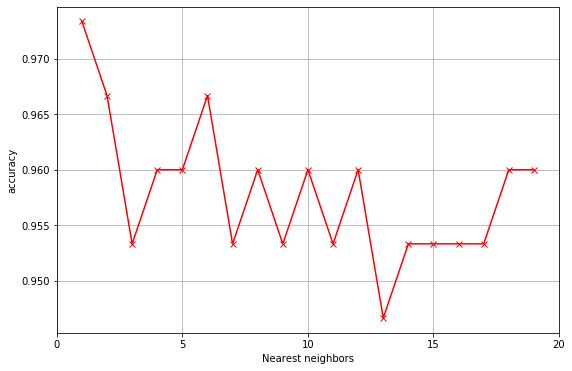

In [40]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure(figsize = (9,6))
plt.xlabel('Nearest neighbors')
plt.ylabel('accuracy')
plt.grid()
plt.plot(k_range, scores,marker = "x",color = "red")
plt.xticks([0,5,10,15,20]);